In [ ]:
import pandas as pd

# Supponiamo che tu abbia già creato il grafo bipartito G
# Carica il dataset "movies" con pandas (assicurati di specificare il percorso corretto al tuo file CSV)
movies_df = pd.read_csv('movies.csv')

In [ ]:
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pickle
with open('grafo_bipartito.pickle', 'rb') as file:
    G = pickle.load(file)

In [ ]:
import networkx as nx

# Calcola il numero di nodi utente
user_nodes = [node for node, data in G.nodes(data=True) if data['bipartite'] == 0]
num_user_nodes = len(user_nodes)

# Calcola il numero di nodi film
film_nodes = [node for node, data in G.nodes(data=True) if data['bipartite'] == 1]
num_film_nodes = len(film_nodes)

# Calcola il numero medio di archi per utente
user_edges = G.edges(user_nodes)
num_user_edges = len(user_edges)
average_edges_per_user = num_user_edges / num_user_nodes if num_user_nodes > 0 else 0

# Stampa le informazioni
print("Numero di nodi utente:", num_user_nodes)
print("Numero di nodi film:", num_film_nodes)
print("Numero medio di archi per utente:", average_edges_per_user)


Numero di nodi utente: 162541
Numero di nodi film: 59047
Numero medio di archi per utente: 153.80793153727367


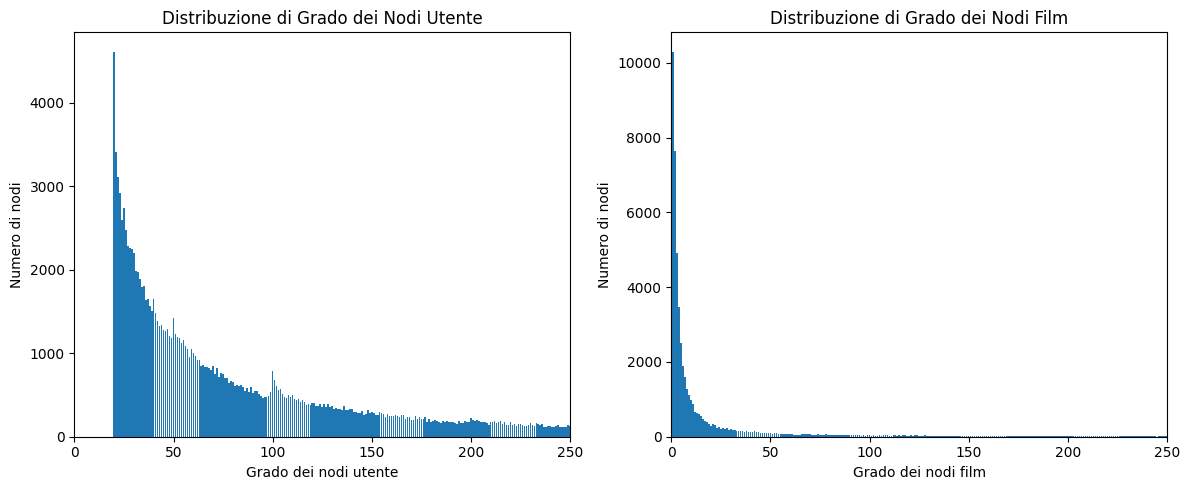

In [ ]:
import matplotlib.pyplot as plt

# Estrai le due bipartizioni
user_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
movie_nodes = set(G) - user_nodes

# Calcola il grado dei nodi di ciascuna bipartizione
user_degrees = dict(G.degree(user_nodes))
movie_degrees = dict(G.degree(movie_nodes))

# Calcola il numero di nodi con lo stesso grado nelle bipartizioni
user_degree_counts = {}
movie_degree_counts = {}

for degree in user_degrees.values():
    user_degree_counts[degree] = user_degree_counts.get(degree, 0) + 1

for degree in movie_degrees.values():
    movie_degree_counts[degree] = movie_degree_counts.get(degree, 0) + 1

# Disegna la distribuzione di grado per ciascuna bipartizione
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(user_degree_counts.keys(), user_degree_counts.values())
plt.xlabel('Grado dei nodi utente')
plt.ylabel('Numero di nodi')
plt.title('Distribuzione di Grado dei Nodi Utente')
plt.xlim(0, 250)  # Limita l'asse x tra 0 e 2

plt.subplot(1, 2, 2)
plt.bar(movie_degree_counts.keys(), movie_degree_counts.values())
plt.xlabel('Grado dei nodi film')
plt.ylabel('Numero di nodi')
plt.title('Distribuzione di Grado dei Nodi Film')

plt.xlim(0, 250)  # Limita l'asse x tra 0 e 2
plt.tight_layout()
plt.show()




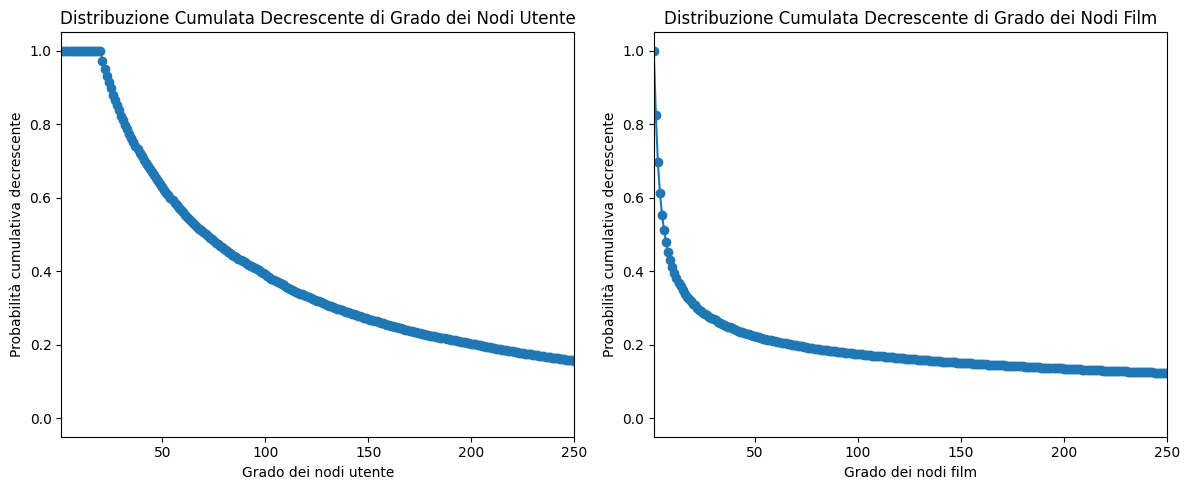

In [ ]:
import numpy as np


# Calcola la distribuzione cumulata decrescente
user_sorted_degrees = sorted(user_degrees.values(), reverse=True)
movie_sorted_degrees = sorted(movie_degrees.values(), reverse=True)

if user_sorted_degrees:
    user_cumulative_degree_probabilities = [np.sum(np.array(user_sorted_degrees) >= degree) / len(user_nodes) for degree in range(1, max(user_sorted_degrees) + 1)]
else:
    user_cumulative_degree_probabilities = []

if movie_sorted_degrees:
    movie_cumulative_degree_probabilities = [np.sum(np.array(movie_sorted_degrees) >= degree) / len(movie_nodes) for degree in range(1, max(movie_sorted_degrees) + 1)]
else:
    movie_cumulative_degree_probabilities = []

# Disegna la distribuzione cumulata decrescente di grado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(user_cumulative_degree_probabilities) + 1), user_cumulative_degree_probabilities, marker='o', linestyle='-')
plt.xlabel('Grado dei nodi utente')
plt.ylabel('Probabilità cumulativa decrescente')
plt.title('Distribuzione Cumulata Decrescente di Grado dei Nodi Utente')
plt.xlim(1, 250)  # Limita l'asse x tra 1 e 250

plt.subplot(1, 2, 2)
plt.plot(range(1, len(movie_cumulative_degree_probabilities) + 1), movie_cumulative_degree_probabilities, marker='o', linestyle='-')
plt.xlabel('Grado dei nodi film')
plt.ylabel('Probabilità cumulativa decrescente')
plt.title('Distribuzione Cumulata Decrescente di Grado dei Nodi Film')
plt.xlim(1, 250)  # Limita l'asse x tra 1 e 250

plt.tight_layout()
plt.show()



In [ ]:


# Identifica i nodi film sulla base dell'attributo 'bipartite'
movie_nodes = [node for node, bipartite in G.nodes(data=True) if bipartite['bipartite'] == 1]

# Calcola la centralità di grado per i nodi film
movie_degree_centrality = nx.degree_centrality(G)

# Trova i film con la più alta centralità di grado
top_movies_by_degree_centrality = sorted(movie_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Stampa i film con la più alta centralità di grado
print("Film con la più alta centralità di grado:")
for movie, centrality_score in top_movies_by_degree_centrality:
    print(f"Film: {movie}, Centralità di Grado: {centrality_score:.4f}")


Film con la più alta centralità di grado:
Film: 356, Centralità di Grado: 0.3678
Film: 318, Centralità di Grado: 0.3677
Film: 296, Centralità di Grado: 0.3596
Film: 593, Centralità di Grado: 0.3345
Film: 2571, Centralità di Grado: 0.3280
Film: 260, Centralità di Grado: 0.3101
Film: 480, Centralità di Grado: 0.2895
Film: 527, Centralità di Grado: 0.2726
Film: 110, Centralità di Grado: 0.2671
Film: 2959, Centralità di Grado: 0.2652


In [ ]:



# Identifica i nodi film sulla base dell'attributo 'bipartite'
movie_nodes = [node for node, bipartite in G.nodes(data=True) if bipartite['bipartite'] == 1]

# Crea un dizionario per mappare i numeri dei film ai titoli
movie_id_to_title = dict(zip(movies_df['movieId'], movies_df['title']))

# Calcola la centralità di grado per i nodi film
movie_degree_centrality = nx.degree_centrality(G)

# Trova i film con la più alta centralità di grado
top_movies_by_degree_centrality = sorted(movie_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Stampa i film con la più alta centralità di grado e i loro titoli
print("Film con la più alta centralità di grado:")
for movie_id, centrality_score in top_movies_by_degree_centrality:
    movie_title = movie_id_to_title.get(movie_id, "Sconosciuto")  # Ottieni il titolo dal dizionario (o usa "Sconosciuto" se mancante)
    print(f"Film: {movie_title}, Centralità di Grado: {centrality_score:.4f}")


Film con la più alta centralità di grado:
Film: Forrest Gump (1994), Centralità di Grado: 0.3678
Film: Shawshank Redemption, The (1994), Centralità di Grado: 0.3677
Film: Pulp Fiction (1994), Centralità di Grado: 0.3596
Film: Silence of the Lambs, The (1991), Centralità di Grado: 0.3345
Film: Matrix, The (1999), Centralità di Grado: 0.3280
Film: Star Wars: Episode IV - A New Hope (1977), Centralità di Grado: 0.3101
Film: Jurassic Park (1993), Centralità di Grado: 0.2895
Film: Schindler's List (1993), Centralità di Grado: 0.2726
Film: Braveheart (1995), Centralità di Grado: 0.2671
Film: Fight Club (1999), Centralità di Grado: 0.2652


In [ ]:
# Calcola il grado di tutti i nodi
node_degrees = G.degree()

# Filtra i nodi film e ordina in base al grado in ordine decrescente
film_degrees = [(node, degree) for node, degree in node_degrees if G.nodes[node]['bipartite'] == 1]
sorted_films = sorted(film_degrees, key=lambda x: x[1], reverse=True)

# Stampa i primi 10 film con il grado più alto e i loro titoli
top_n = 10  # Modifica questo valore per ottenere il numero desiderato di film
for movie_id, degree in sorted_films[:top_n]:
    movie_title = movie_id_to_title.get(movie_id, "Sconosciuto")
    print(f"Numero del film: {movie_id}, Titolo del film: {movie_title}, Grado: {degree}")


Numero del film: 356, Titolo del film: Forrest Gump (1994), Grado: 81491
Numero del film: 318, Titolo del film: Shawshank Redemption, The (1994), Grado: 81482
Numero del film: 296, Titolo del film: Pulp Fiction (1994), Grado: 79672
Numero del film: 593, Titolo del film: Silence of the Lambs, The (1991), Grado: 74127
Numero del film: 2571, Titolo del film: Matrix, The (1999), Grado: 72674
Numero del film: 260, Titolo del film: Star Wars: Episode IV - A New Hope (1977), Grado: 68717
Numero del film: 480, Titolo del film: Jurassic Park (1993), Grado: 64144
Numero del film: 527, Titolo del film: Schindler's List (1993), Grado: 60411
Numero del film: 110, Titolo del film: Braveheart (1995), Grado: 59184
Numero del film: 2959, Titolo del film: Fight Club (1999), Grado: 58773
